<a href="https://colab.research.google.com/github/albatellouc3m/P1_AA/blob/main/P1_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar datos**

Primeramente tenemos que leer los datos en local (archivos de google colab) En nuestro caso, hemos elegido el NIA 100495755, donde los dos últimos dígitos son 5 y 5. Por lo que nuestro dataset seria el número 10 (5 + 5 = 10).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_generales = pd.read_csv('./attrition_availabledata_10.csv.gz')
datos_test = pd.read_csv('./attrition_competition_10.csv.gz') # Datos para realizar el test

datos_generales.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7.462297,13,3,3,3.0,3.0,3.0,48,Travel_Rarely,Research & Development,...,Y,13,8,1,18.0,2,8,7,7,No
1,7.488597,6,1,3,3.0,4.0,4.0,31,Travel_Frequently,Research & Development,...,Y,17,8,1,3.0,2,1,0,0,Yes
2,7.116541,16,2,4,1.0,1.0,3.0,36,Travel_Rarely,Research & Development,...,Y,24,8,0,6.0,6,5,0,3,No
3,9.709125,6,3,4,3.0,3.0,3.0,49,Travel_Rarely,Research & Development,...,Y,22,8,0,25.0,2,7,0,7,No
4,6.297729,6,4,3,3.0,2.0,3.0,40,Travel_Frequently,Research & Development,...,Y,13,8,1,8.0,3,8,3,7,No


#**2. EDA** **Simplificado**




Antes de realizar el preprocesado de datos, debemos analizar el set de datos para sacar información importante para el ejercicio. Los pasos de este análisis son los siguientes:

## 2.1 ¿Cuantas variables e instancias hay?

  El set de availabledata contiene un total de 2940 instancias y 31 variables. Para calcularlo hemos utilizado el comando *shape*.  


In [ ]:
from IPython.display import display

display(datos_generales.shape)

(2940, 31)

##2.2 Tipos de variables

 En el conjunto de datos propuesto para el ejercicio se pueden identificar varios tipos de variable. Para mostrarlos usamos el comando *dtype*, el cual te muestra cada variable con su tipo.



In [ ]:
from IPython.display import display

display(datos_generales.dtypes)

,0
hrs,float64
absences,int64
JobInvolvement,int64
PerformanceRating,int64
EnvironmentSatisfaction,float64
JobSatisfaction,float64
WorkLifeBalance,float64
Age,int64
BusinessTravel,object
Department,object


##2.3 Variables categóricas con alta cardinalidad

  Debemos estudiar si hay variables categóricas con alta cardinalidad, es decir, variables que toman un gran número de valores distintos, ya que estas variables pueden causar problemas y hacer que el modelo sea más complejo.

  El código para identificarlas es el siguiente:

In [ ]:
for col in datos_generales.select_dtypes(include=['object']).columns:
    print(f'{col}: {datos_generales[col].nunique()} valores únicos')

BusinessTravel: 3 valores únicos
Department: 3 valores únicos
EducationField: 6 valores únicos
Gender: 2 valores únicos
JobRole: 9 valores únicos
MaritalStatus: 3 valores únicos
Over18: 1 valores únicos
Attrition: 2 valores únicos


##2.4 ¿Que variables tienen valores faltantes y cuantos?

  Para saber que variables tienen valores faltantes, es decir que en alguna de las instancias no tenga valor asignado, utilizamos el comando *isnull*.

In [ ]:
datos_generales.isnull().sum() # Añadimos el sum para que nos muestre una cuenta total de valores nulos y no uno por uno

,0
hrs,0
absences,0
JobInvolvement,0
PerformanceRating,0
EnvironmentSatisfaction,15
JobSatisfaction,12
WorkLifeBalance,29
Age,0
BusinessTravel,0
Department,0


## 2.5 Columnas constantes o de id

  Columnas constantes son aquellas que tienen el mismo valor para todas las instancias del conjunto de datos.

  Por otro lado, columnas de id son aquellas que contienen identificadores únicos para cada instancia.

  En nuestro conjunto de datos, la primera columna es de ID y podemos usar el comando nunique. Ya que en la pregunta 3 lo necesitabamos, vimos en el resultado que la variable Over18 es constante, y por lo tanto, no aporta información útil en el desarrollo del ejercicio.
  

##2.6 Regresion o clasificación:

  Se trata de un problema de clasificación, ya que la columna de clases no contiene valores reales. Además vemos que está completamente desbalanceado ya que tenemos 474 valores de attrition 'No' y 2466 de 'Yes'. El código para esta resolución es el siguiente:

In [ ]:
# Creamos contadores para cada valor
contador_yes = 0
contador_no = 0

# Recorremos todas las instancias de Attrition y vemos cuantos de cada valor hay
for valor in datos_generales['Attrition']:
    if valor == 'Yes':
        contador_yes += 1
    elif valor == 'No':
        contador_no += 1

print(f'Yes: {contador_yes}')
print(f'No: {contador_no}')


Yes: 474
No: 2466


# **3. Decidir cómo se va a realizar la Evaluación**

El objetivo de esta sección es definir correctamente la estrategia de evaluación del modelo, asegurando que los resultados sean fiables y reproducibles. Se propone un enfoque de doble nivel de evaluación:


1.   Evaluación Outer (Holdout): Para estimar el rendimiento futuro real del modelo.
2.   Evaluación Inner (Cross Validation): Para comparar modelos y realizar optimización de hiperparámetros (HPO) dentro de la partición de entrenamiento (train).



## 3.1 Visión general del proceso
El siguiente esquema muestra el flujo de evaluación:



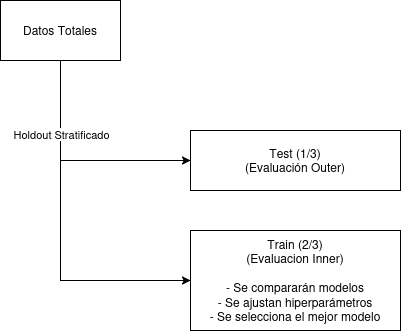



1.   Partición en Holdout

    *   Se divide el conjunto de datos en 2/3 para train y 1/3 para test, manteniendo la proporción de la variable objetivo (stratify).
    *   El conjunto train se usará durante la mayor parte de la práctica (para comparar modelos, probar hiperparámetros, etc.).
    *   El conjunto test se usará solo al final, para obtener la estimación real de rendimiento del modelo final (outer).

2.   Evaluación interna (inner)

    *   Dentro de train se aplica K-Fold Cross Validation (por ejemplo, 5 folds estratificados).
    *   Se utilizan las medias de las métricas obtenidas en CV para comparar diferentes modelos y ajustes de hiperparámetros (HPO).
    *   Al concluir, se elige la combinación que ofrezca mejor rendimiento según la métrica principal.

3.   Evaluación externa (outer)

    *   Una vez decidido el modelo y ajustados los hiperparámetros, se reentrena con todo train.
    *   Finalmente, se evalúa sobre test para obtener la estimación de rendimiento futuro.



## 3.2 Partición Holdout y primeros pasos

La división de los datos en Holdout se hará así: dos tercios (2/3) se usarán para train y un tercio (1/3) para test. Es clave mantener la proporción original de la variable objetivo (Attrition), ya que hay un desbalance entre los empleados que renuncian y los que no. Para lograrlo, se aplicará un método de estratificación en la partición.

Este código muestra cómo se realiza la partición estratificada en 2/3 para entrenamiento y 1/3 para test:

In [ ]:
from sklearn.model_selection import train_test_split

# Convertimos la variable objetivo 'Attrition' a 1 (Yes) / 0 (No)
datos_generales['Attrition'] = datos_generales['Attrition'].map({'Yes': 1, 'No': 0})

# Definir las características (X) y la variable objetivo (y)
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

# División en 2/3 (train) y 1/3 (test), con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,
    random_state=10,
    stratify=y
)

# Verificamos la distribución de la clase en cada conjunto
print("Distribución en Train:\n", y_train.value_counts(normalize=True))
print("\nDistribución en Test:\n", y_test.value_counts(normalize=True))


Distribución en Train:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

Distribución en Test:
 Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64


La salida es:


*   Train: ~16.1% de renunciantes (1) y ~83.9% de no renunciantes (0)
*   Test: ~16.1% de renunciantes (1) y ~83.9% de no renunciantes (0)




## 3.3 Métricas de Evaluación

La métrica principal para evaluar el modelo será la Balanced Accuracy, útil en problemas de clasificación desbalanceada. Se obtiene como el promedio del True Positive Rate (TPR) y el True Negative Rate (TNR).


### 3.3.1 Definiciones de métricas de Evaluación

El True Positive Rate (TPR), indica la proporción de empleados que renunciaron y fueron clasificados correctamente. Se calcula como:

$TPR = \frac{TP}{TP + FN}$

donde:


*   TP: son los empleados que realmente renunciaron y el modelo los predijo correctamente.
*   FN: son los empleados que renunciaron pero que el modelo los predijo incorrectamente, como que se quedaron.



El True Negative Rate (TNR) mide la proporción de empleados que no renunciaron y fueron clasificados correctamente:

$TPR = \frac{TN}{TN + FP}$

donde:

  

*     TN: empleados que no renunciaron y fueron clasificados correctamente.
*     FP: empleados que no renunciaron pero fueron clasificados como renunciantes.






La Balanced Accuracy se obtiene con la siguiente fórmula:

$BalancedAccuracy = \frac{TPR+TNR}{2}$

Esta métrica es más fiable que la Accuracy estándar en datos desbalanceados, ya que evita sesgos hacia la clase mayoritaria.

Otras métricas que se calcularán incluyen:

*   Accuracy, que mide la proporción total de predicciones correctas.
*   Matriz de confusión, que detalla los aciertos y errores del modelo en ambas clases.




### 3.3.2 Modelo Base: Dummy Classifier
Antes de entrenar cualquier modelo complejo, es útil contar con una línea base (baseline) para comparar. Un Dummy Classifier que predice siempre la clase mayoritaria servirá para ver si nuestros futuros modelos realmente aportan valor.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

# Modelo Dummy (predice siempre 'No renuncia' - clase mayoritaria)
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, y_train)

# Predicción en test
y_pred_dummy = dummy_model.predict(X_test)

# Cálculo de métricas
acc_dummy = accuracy_score(y_test, y_pred_dummy)
balanced_acc_dummy = balanced_accuracy_score(y_test, y_pred_dummy)
cm_dummy = confusion_matrix(y_test, y_pred_dummy)

# Extraer TPR y TNR a partir de la matriz de confusión
tn = cm_dummy[0,0]
fp = cm_dummy[0,1]
fn = cm_dummy[1,0]
tp = cm_dummy[1,1]

tpr_dummy = tp / (tp + fn)
tnr_dummy = tn / (tn + fp)

print("Dummy Classifier - Modelo Trivial")
print("Accuracy:", acc_dummy)
print("Balanced Accuracy:", balanced_acc_dummy)
print("TPR:", tpr_dummy)
print("TNR:", tnr_dummy)
print("\nMatriz de Confusión:\n", cm_dummy)



Dummy Classifier - Modelo Trivial
Accuracy: 0.8387755102040816
Balanced Accuracy: 0.5
TPR: 0.0
TNR: 1.0

Matriz de Confusión:
 [[822   0]
 [158   0]]


Este modelo sirve como una línea base mínima para comparar con modelos más avanzados más adelante.

## 3.4 Evaluación inner
La evaluación interna (inner) se aplicará dentro del conjunto de entrenamiento (X_train, y_train) para comparar modelos y ajustar hiperparámetros. Sirve para:

*   Comparar modelos como KNN o Árboles de Decisión.
*   Ajustar hiperparámetros con GridSearchCV o RandomizedSearchCV.



### 3.4.1 K-Fold Stratificado

Se emplea K-Fold Cross Validation con estratificación (p.ej., k=5). En cada iteración, 4 folds se usan para entrenar y 1 fold para validar, repitiendo el proceso con todos los folds. El promedio de resultados en las iteraciones da una estimación robusta del rendimiento.

Un diagrama se vería asi
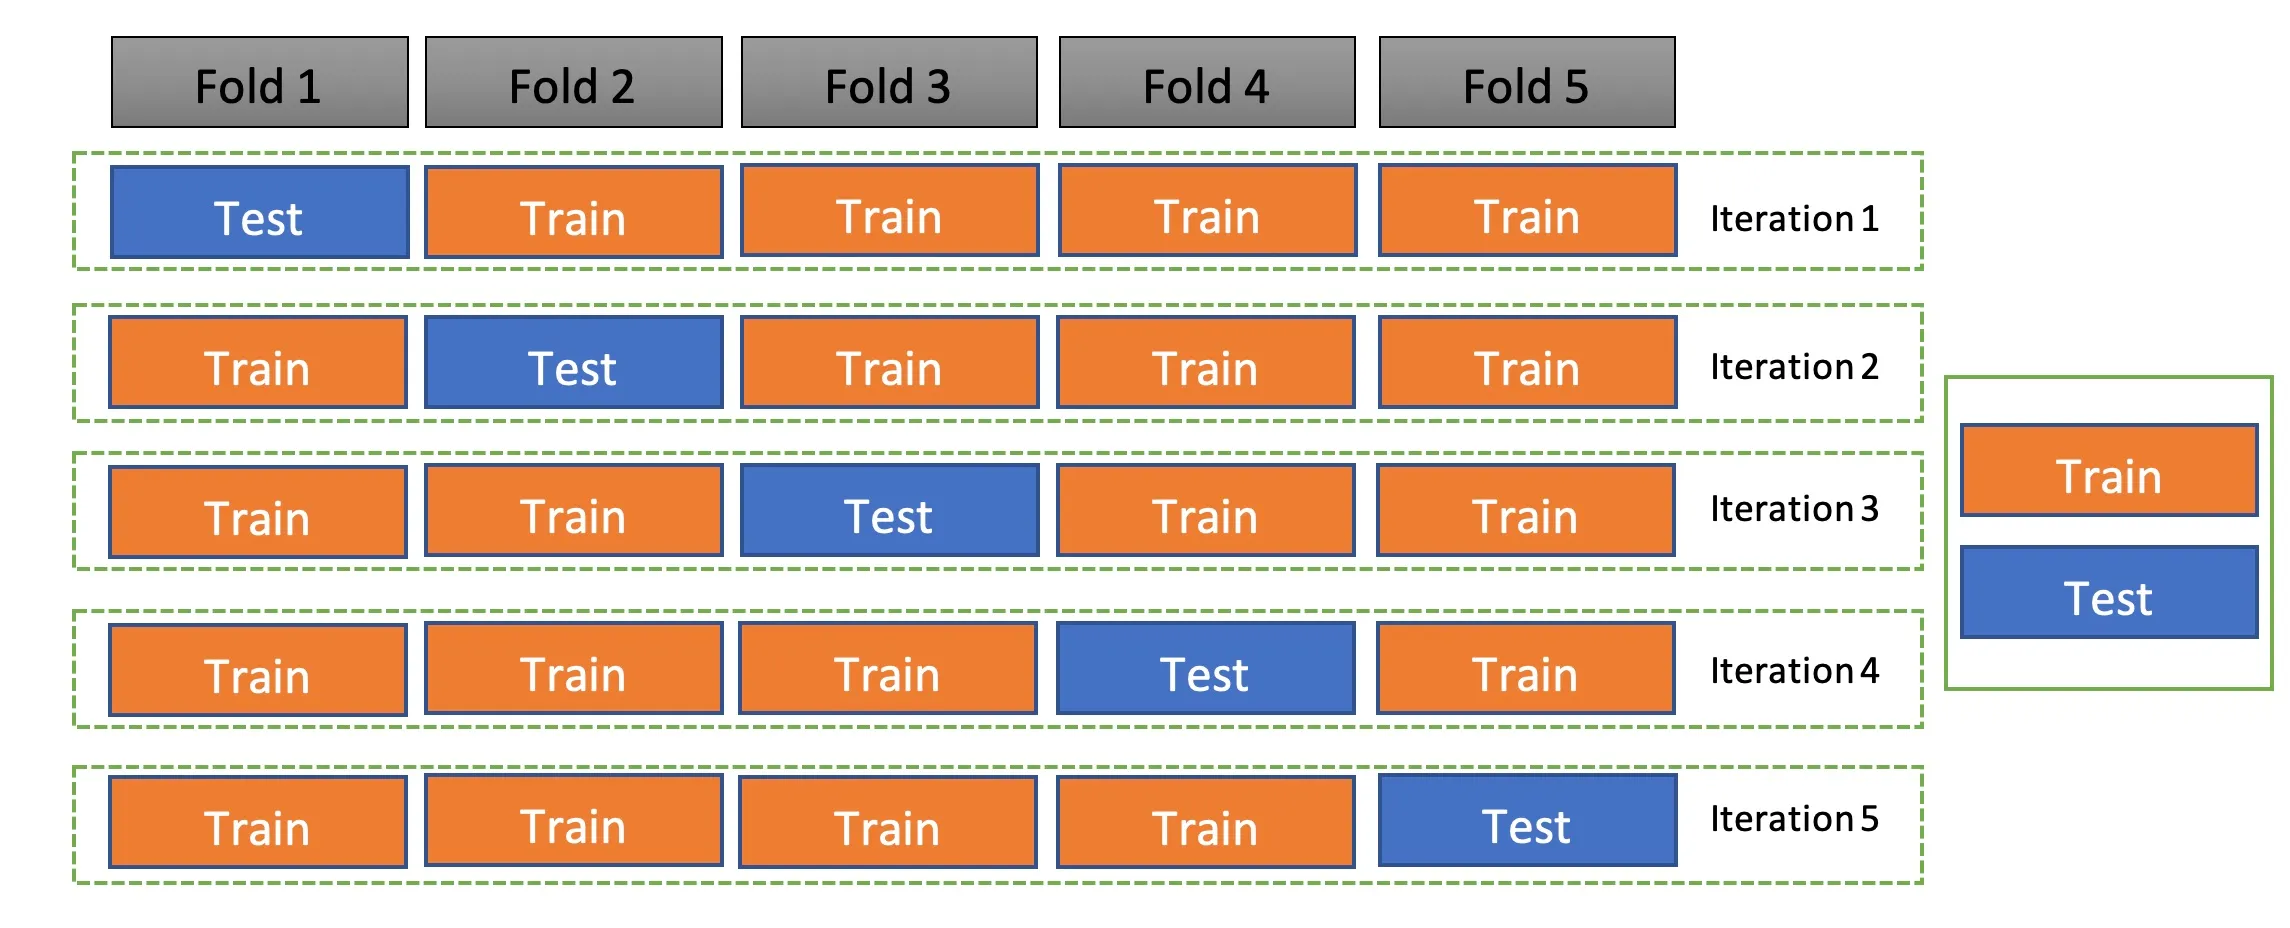

## 3.5 Evaluación Final (Outer)
Una vez elegido el modelo y ajustados los hiperparámetros:
   *   Entrenamos ese modelo con todo X_train, y_train (en lugar de entrenarlo solo con los folds).
   *   Evaluamos con X_test, y_test para obtener las métricas finales (Balanced Accuracy, TPR, TNR, Accuracy, matriz de confusión). Este es el resultado final que se reporta como rendimiento futuro esperado.

# **4.Métodos básicos: KNN y TREES**



Esta sección explora modelos de tipo K-Nearest Neighbors (KNN) y árboles de decisión como aproximaciones básicas al problema de clasificación. Primero se decide cómo abordar la imputación y el escalado de las variables, factores que pueden incidir de forma notable en el rendimiento de KNN. Después se entrena el modelo con parámetros por omisión y se mide el tiempo de entrenamiento y la métrica principal (Balanced Accuracy). Seguidamente se ajustan algunos hiperparámetros importantes y se comprueba si la mejora obtenida justifica el incremento en el coste computacional. Finalmente se comentan las conclusiones comparando también con el modelo dummy previo.

## 4.1 Preparación de Datos e Identificación de columnas
La decisión de escalado e imputación parte de un análisis previo de las variables categóricas y numéricas. A continuación se muestran algunas celdas de código que inspeccionan los valores únicos y listan las columnas que se tratarán de forma distinta según su naturaleza.

In [ ]:
import pandas as pd
from IPython.display import display

categorical_columns = datos_generales.select_dtypes(include=['object','category']).columns.tolist()
print("Columnas categóricas:")
display(categorical_columns)

for column in categorical_columns:
    unique_values = datos_generales[column].unique()
    print(f"Valores únicos para la columna {column}:")
    display(unique_values)


Columnas categóricas:


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

Valores únicos para la columna BusinessTravel:


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

Valores únicos para la columna Department:


array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

Valores únicos para la columna EducationField:


array(['Medical', 'Other', 'Life Sciences', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

Valores únicos para la columna Gender:


array(['Male', 'Female'], dtype=object)

Valores únicos para la columna JobRole:


array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Manager', 'Sales Executive',
       'Human Resources', 'Research Director',
       'Healthcare Representative', 'Sales Representative'], dtype=object)

Valores únicos para la columna MaritalStatus:


array(['Divorced', 'Single', 'Married'], dtype=object)

Valores únicos para la columna Over18:


array(['Y'], dtype=object)

Tras inspeccionar los datos, se separan las características (X) de la variable objetivo (y). Las columnas irrelevantes para la predicción se eliminan para evitar añadir ruido al proceso. También se definen las listas de variables categóricas y numéricas, algo esencial para aplicar las transformaciones de forma adecuada.

In [ ]:
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

categorical_features = ['Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus', 'BusinessTravel']
numerical_features = X.select_dtypes(include=['int64','float64']).columns.tolist()


Se ha optado por un ColumnTransformer que imputa valores numéricos con SimpleImputer y codifica variables categóricas con OneHotEncoder. Para la parte numérica se prueban estrategias de imputación basadas en la media y en la mediana. Se comprueba también el rendimiento de KNN para varios números de vecinos y diferentes opciones de pesos. El objetivo es maximizar Balanced Accuracy, dada la naturaleza desbalanceada del problema.

In [ ]:
import pandas as pd
from IPython.display import display
# Suponiendo que tu dataset se llama 'datos_generales'
categorical_columns = datos_generales.select_dtypes(include=['object', 'category']).columns.tolist()

# Imprimir las columnas categóricas
print("Columnas categóricas:")
display(categorical_columns)

# Suponiendo que tu dataset se llama 'datos_generales'
for column in datos_generales.columns:
    unique_values = datos_generales[column].unique()
    print("Valores únicos para la columna:")
    display(unique_values)

Columnas categóricas:


['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

Valores únicos para la columna:


array([7.46229697, 7.48859661, 7.11654061, ..., 5.86131415, 9.02572066,
       6.70904953])

Valores únicos para la columna:


array([13,  6, 16, 21, 14, 17,  7, 12,  4,  8, 19, 23, 15, 20, 10,  9, 18,
        3,  5, 22,  2, 11,  1, 24])

Valores únicos para la columna:


array([3, 1, 2, 4])

Valores únicos para la columna:


array([3, 4])

Valores únicos para la columna:


array([ 3.,  1.,  4.,  2., nan])

Valores únicos para la columna:


array([ 3.,  4.,  1.,  2., nan])

Valores únicos para la columna:


array([ 3.,  4.,  2.,  1., nan])

Valores únicos para la columna:


array([48, 31, 36, 49, 40, 52, 27, 47, 29, 35, 37, 33, 23, 45, 26, 34, 53,
       50, 56, 32, 46, 25, 39, 24, 20, 30, 58, 44, 28, 59, 43, 54, 21, 22,
       51, 41, 38, 42, 57, 19, 55, 18, 60])

Valores únicos para la columna:


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

Valores únicos para la columna:


array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

Valores únicos para la columna:


array([12,  2, 14,  1, 10, 29,  3, 25,  5, 23, 20,  4,  7,  6, 27, 15, 26,
        9, 22, 19, 13,  8, 24, 16, 28, 21, 18, 17, 11])

Valores únicos para la columna:


array([4, 2, 3, 5, 1])

Valores únicos para la columna:


array(['Medical', 'Other', 'Life Sciences', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

Valores únicos para la columna:


array([1])

Valores únicos para la columna:


array([2316, 2193, 1846, ...,  213, 1490,  510])

Valores únicos para la columna:


array(['Male', 'Female'], dtype=object)

Valores únicos para la columna:


array([1, 2, 3, 4, 5])

Valores únicos para la columna:


array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Manager', 'Sales Executive',
       'Human Resources', 'Research Director',
       'Healthcare Representative', 'Sales Representative'], dtype=object)

Valores únicos para la columna:


array(['Divorced', 'Single', 'Married'], dtype=object)

Valores únicos para la columna:


array([ 55620,  53960,  39290, ...,  28000,  75530, 170680])

Valores únicos para la columna:


array([ 8.,  7.,  0.,  1.,  3.,  4.,  5.,  9.,  2.,  6., nan])

Valores únicos para la columna:


array(['Y'], dtype=object)

Valores únicos para la columna:


array([13, 17, 24, 22, 11, 19, 12, 15, 14, 23, 20, 16, 21, 25, 18])

Valores únicos para la columna:


array([8])

Valores únicos para la columna:


array([1, 0, 3, 2])

Valores únicos para la columna:


array([18.,  3.,  6., 25.,  8.,  9., 16., 27., 11., 22., 10., 14.,  7.,
        4.,  1., 17., 35., 12., 36., 19.,  5.,  2., 20., 30., 15., 13.,
       29., 23., 24., 38., 40., 21., 32., 26., 31., nan,  0., 37., 28.,
       34., 33.])

Valores únicos para la columna:


array([2, 6, 3, 1, 4, 5, 0])

Valores únicos para la columna:


array([ 8,  1,  5,  7,  6, 15,  3, 14,  9,  4, 17, 16,  2, 20, 11,  0, 12,
       21, 10, 37, 23, 22, 31, 13, 19, 18, 26, 25, 29, 27, 24, 33, 36, 40,
       32, 34])

Valores únicos para la columna:


array([ 7,  0,  3,  1,  5,  2,  8,  6, 11,  9,  4, 14, 13, 12, 10, 15])

Valores únicos para la columna:


array([ 7,  0,  3,  4, 11,  2,  8,  1, 10, 12,  5,  9,  6, 14, 17, 13, 16,
       15])

Valores únicos para la columna:


array([0, 1])

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.compose import ColumnTransformer

# Definir las características (X) y la variable objetivo (y)
X = datos_generales.drop(columns=['Attrition', 'EmployeeID', 'Over18', 'EmployeeCount', 'StandardHours'])
y = datos_generales['Attrition']

# Definir las columnas categóricas y numéricas
categorical_features = ['Department', 'JobRole', 'EducationField', 'Gender', 'MaritalStatus', 'BusinessTravel']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer()),
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
        ]), categorical_features)])


# Crear el pipeline con el preprocesamiento y el modelo KNN
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# Definir los parámetros para GridSearchCV
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

# Crear un objeto StratifiedKFold para la validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=495774)

# Crear un objeto GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=skf, verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (Balanced Accuracy):", grid_search.best_score_)
print("Mejor estimador:", grid_search.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros: {'knn__n_neighbors': 3, 'knn__weights': 'distance', 'preprocessor__num__imputer__strategy': 'mean'}
Mejor puntuación (Balanced Accuracy): 0.7767690340277263
Mejor estimador: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['hrs', 'absences',
                                                   'JobInvolvement',
                                                   'PerformanceRating',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance', 'Age',
                                                   'Di

## 4.2 Evaluación de KNN y Árboles de Decisión

### 4.2.1 Modelos con Hiperparámetros por Omisión y Tiempo de Entrenamiento

*KNN con parámetros por omisión*

In [13]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Copiamos el pipeline base, suponiendo que ya tienes un ColumnTransformer "preprocessor"
# que imputa y codifica/escala. Aquí reutilizamos 'preprocessor' en un nuevo pipeline.
default_knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # tu ColumnTransformer
    ('knn', KNeighborsClassifier())  # sin especificar nada: hiperparámetros por omisión
])

# Medimos tiempo de entrenamiento
start_time = time.time()
default_knn_pipeline.fit(X_train, y_train)
end_time = time.time()

training_time_knn_default = end_time - start_time
print(f"Tiempo de entrenamiento KNN (default): {training_time_knn_default:.4f} segundos")

# Evaluamos en el conjunto de entrenamiento con CV interno o directamente en test
# (Si deseas ver la métrica en test provisionalmente, para comparar)
y_pred_knn_default = default_knn_pipeline.predict(X_test)
balacc_knn_default = balanced_accuracy_score(y_test, y_pred_knn_default)

print(f"Balanced Accuracy KNN (default): {balacc_knn_default:.4f}")

# (Opcional) Podemos ver TPR y TNR, y la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn_default).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"TPR (Sensibilidad/Recall clase positiva): {tpr:.3f}")
print(f"TNR (Specificity clase negativa): {tnr:.3f}")


Tiempo de entrenamiento KNN (default): 0.0288 segundos
Balanced Accuracy KNN (default): 0.5790
TPR (Sensibilidad/Recall clase positiva): 0.215
TNR (Specificity clase negativa): 0.943


*Árbol de decisión con parámetros por omisión*

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un pipeline similar, esta vez con un árbol de decisión
default_tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42))  # por omisión, max_depth=None, etc.
])

# Medimos tiempo de entrenamiento
start_time = time.time()
default_tree_pipeline.fit(X_train, y_train)
end_time = time.time()

training_time_tree_default = end_time - start_time
print(f"Tiempo de entrenamiento Árbol (default): {training_time_tree_default:.4f} segundos")

y_pred_tree_default = default_tree_pipeline.predict(X_test)
balacc_tree_default = balanced_accuracy_score(y_test, y_pred_tree_default)
print(f"Balanced Accuracy Árbol (default): {balacc_tree_default:.4f}")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tree_default).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
print(f"TPR: {tpr:.3f}")
print(f"TNR: {tnr:.3f}")


Tiempo de entrenamiento Árbol (default): 0.0688 segundos
Balanced Accuracy Árbol (default): 0.8470
TPR: 0.734
TNR: 0.960


En este primer paso comparamos:
    * Tiempo de entrenamiento de KNN y Árbol de decisión con sus parámetros por omisión
    * Balanced Accuracy, TPR y TNR

### 4.2.2 Ajuste de Hiperparámetros y Medición de Tiempos
Aquí realizaremos un GridSearchCV. Se miden los tiempos de entrenamiento con la búsqueda con el train set.


*Búsqueda de Hiperparámetros importantes en KNN*
Los hiperparámetros principales de KNN suelen ser:

    * n_neighbors: número de vecinos,
    * weights: uniforme o ponderado por la distancia,

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definimos la rejilla de hiperparámetros
param_grid_knn = {
    # Ejemplo para la imputación numérica si lo estás evaluando también
    # 'preprocessor__num__imputer__strategy': ['mean', 'median'], 

    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']  # si quieres probar otras distancias
}

# Configuramos la validación cruzada estratificada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Creación del pipeline base (mismo que default, pero sin hiperparámetros fijos)
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())  # KNN "vacío" para poder tunear
])

grid_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    scoring='balanced_accuracy',
    cv=skf,
    n_jobs=-1, 
    verbose=1
)

start_time = time.time()
grid_knn.fit(X_train, y_train)
end_time = time.time()

training_time_knn_hpo = end_time - start_time
print(f"Tiempo de entrenamiento KNN (HPO): {training_time_knn_hpo:.4f} segundos")

print("Mejores parámetros KNN:", grid_knn.best_params_)
print("Mejor Balanced Accuracy CV (KNN):", grid_knn.best_score_)

# Se extrae el mejor modelo
best_knn_model = grid_knn.best_estimator_

# Evaluar en test
y_pred_knn_best = best_knn_model.predict(X_test)
balacc_knn_best = balanced_accuracy_score(y_test, y_pred_knn_best)
print(f"Balanced Accuracy en test (KNN con HPO): {balacc_knn_best:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tiempo de entrenamiento KNN (HPO): 2.7466 segundos
Mejores parámetros KNN: {'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Mejor Balanced Accuracy CV (KNN): 0.787634510321167
Balanced Accuracy en test (KNN con HPO): 0.8349


*Búsqueda de hiperparámetros importantes en Árbol de decisión*
Los hiperparámetros más comunes en un DecisionTreeClassifier son::

    * max_depth (profundidad máxima),
    * min_samples_split,
    * min_samples_leaf.

In [16]:
param_grid_tree = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 5]
}

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42))
])

grid_tree = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=param_grid_tree,
    scoring='balanced_accuracy',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_tree.fit(X_train, y_train)
end_time = time.time()

training_time_tree_hpo = end_time - start_time
print(f"Tiempo de entrenamiento Árbol (HPO): {training_time_tree_hpo:.4f} segundos")

print("Mejores parámetros Árbol:", grid_tree.best_params_)
print("Mejor Balanced Accuracy CV (Árbol):", grid_tree.best_score_)

best_tree_model = grid_tree.best_estimator_

y_pred_tree_best = best_tree_model.predict(X_test)
balacc_tree_best = balanced_accuracy_score(y_test, y_pred_tree_best)
print(f"Balanced Accuracy en test (Árbol con HPO): {balacc_tree_best:.4f}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Tiempo de entrenamiento Árbol (HPO): 1.7397 segundos
Mejores parámetros Árbol: {'tree__max_depth': None, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 2}
Mejor Balanced Accuracy CV (Árbol): 0.800231605896986
Balanced Accuracy en test (Árbol con HPO): 0.8470


### 4.2.3 Efecto de los valores de los hiperparámetros
Podemos visualizar cómo varía la métrica de Balanced Accuracy en validación cruzada para cada valor de hiperparámetro. Una forma práctica es extraer grid_search.cv_results_ y plotear con Matplotlib.

Ejemplo: Efecto de n_neighbors y weights en KNN

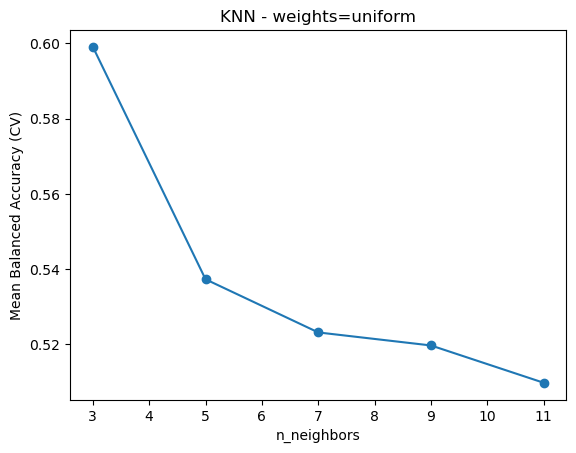

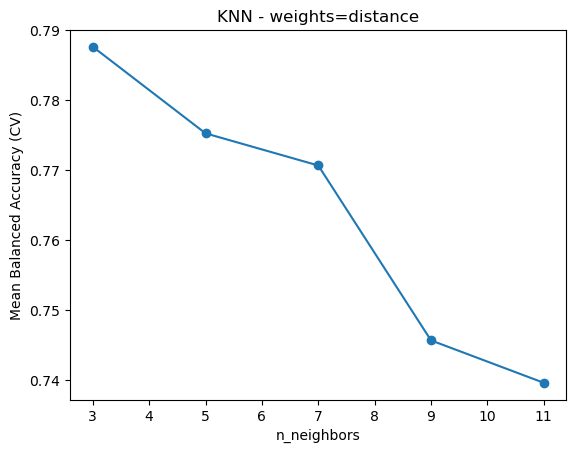

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

results_knn = pd.DataFrame(grid_knn.cv_results_)

# Supongamos que queremos mostrar la media de Balanced Accuracy
# vs. n_neighbors para cada tipo de weights

for w in results_knn['param_knn__weights'].unique():
    subset = results_knn[results_knn['param_knn__weights'] == w]
    plt.figure()  # un plot nuevo
    plt.title(f"KNN - weights={w}")
    plt.plot(subset['param_knn__n_neighbors'], subset['mean_test_score'], marker='o')
    plt.xlabel('n_neighbors')
    plt.ylabel('Mean Balanced Accuracy (CV)')
    plt.show()


Ejemplo: Efecto de max_depth en Árboles

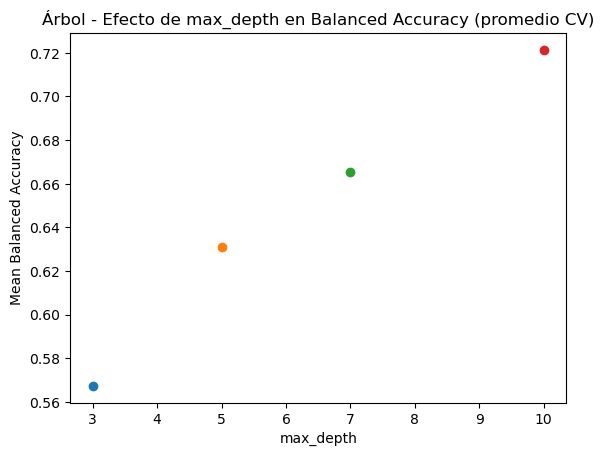

In [18]:
results_tree = pd.DataFrame(grid_tree.cv_results_)

# Graficar la variación con max_depth
plt.figure()
for depth in results_tree['param_tree__max_depth'].unique():
    # Filtramos
    subset = results_tree[results_tree['param_tree__max_depth'] == depth]
    # Tomar la media o el mejor de esa condición
    mean_score = subset['mean_test_score'].mean()
    plt.scatter(depth, mean_score)  # un simple scatter
plt.title("Árbol - Efecto de max_depth en Balanced Accuracy (promedio CV)")
plt.xlabel("max_depth")
plt.ylabel("Mean Balanced Accuracy")
plt.show()
